# Introducción al modelado de circuitos genéticos
### Gen no regulado
Un gen no regulado simplemente produce ARN mensajero (ARNm) a partir de ADN y proteina a partir del ARNm)
Podemos modelar nuestra producción de ARNm:
\begin{align}
\frac{\mathrm{d}m}{\mathrm{d}t} &= \beta_m - \gamma_m\,m,\\[2mm]
\end{align}

donde $\beta_m$ es la tasa de producción de mRNA y $\gamma_m$ su tasa de degradación

Y la produccion de proteína:
\begin{align}
\frac{\mathrm{d}p}{\mathrm{d}t} &= \beta_p\,m - \gamma_p\,p,\\[2mm]
\end{align}

donde $\beta_p$ es la tasa de produccion de proteina y $\gamma_p$ su tasa de degradación. 

### Gen autoregulado
Usaremos la función de Hill para modelar un gen que se autoregula de forma negativa. Es importante recordar que la proteína ejerce la represión sobre la producción del ARNm. Por lo tanto, la producción de ARNm es:
\begin{align}
\frac{dm}{dt} = \beta_m\frac{1}{1 + (\frac{p}{K_D})^n} - \gamma_m m
\end{align}

donde $K_D$ es la tasa de disociación de la proteína $p$, y $n$ cooperatividad o coeficiente de Hill.
La proteína simplemente depende del mensajero producido, por lo que la ecuación es la misma que en un gen no regulado.
Podemos observar gráficamente sus comportamientos:


(0, 200)

/Users/porfirio/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


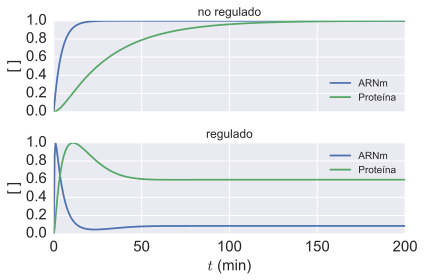

In [85]:
%matplotlib inline
import matplotlib as mpl
# Para hacer graficos SVG inline
%config InlineBackend.figure_format = 'svg'
tamano_fuente = 15
# parametros para matplotlib
params = {'xtick.labelsize':tamano_fuente,'ytick.labelsize':tamano_fuente, 
          'axes.labelsize':tamano_fuente, 'figure.autolayout':True}
# actualizar parametros
mpl.rcParams.update(params)

from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import odeint
import seaborn as sns

# Definir los parametros
beta_m = 3.0 # moleculas de ARNm/  min
gamma_m = 1.0/5 + 1.0/30 # 1/5 min (deg) + 1/30 min (dilucion)
beta_p = 3.0 # moleculas de proteina / min
gamma_p = 1.0/1200 + 1.0/30 # 1/1200 min (deg) + 1/30 min (dilucion)
# condiciones iniciales
p0 = (0,0)
t = np.linspace(0, 500, 1000)

def trans_trad(p0, t):
    """
    Ecuaciones para transcripcion y traduccion de un gen
    """
    m,p = p0
    dm_dt = beta_m - gamma_m * m
    dp_dt = beta_p * m - gamma_p * p
    return dm_dt, dp_dt

def auto_represion(p0, t, k, n):
    """
    Ecuacion que describe un gen que se autoreprime
    """
    m, p = p0
    dm_dt = beta_m / (1 + (p/k)**n) - gamma_m * m
    dp_dt = beta_p * m - gamma_p * p
    return dm_dt, dp_dt

# parametros extra
k = 1.0
n = 2.0

# produccion no regulada
mrna, prot = odeint(trans_trad, p0, t).T
# produccion regulada
mrna_reg, prot_reg = odeint(auto_represion, p0, t, args=(k, n)).T
fig, axes = plt.subplots(2, sharex=True)
axes[0].set_title('no regulado')
axes[0].plot(t,mrna/mrna.max(), label='ARNm')
axes[0].plot(t,prot/prot.max(), label='Proteína')
axes[1].set_title('regulado')
axes[1].plot(t,mrna_reg/mrna_reg.max(), label='ARNm')
axes[1].plot(t,prot_reg/prot_reg.max(), label='Proteína')
axes[0].legend(loc=4)
axes[1].legend(loc=1)
for ax in axes: ax.set_ylabel('[ ]')
axes[1].set_xlabel('$t$ (min)')
plt.xlim(0, 200)

Visualmente y con la producción normalizada, es evidente que el ARNm alcanza un estado estable rápidamente en comparación con la proteína; ésto nos dice que funcionan en escalas de tiempo distintas, y podemos simplificar nuestro modelo e ignorar la dinámica del ARNm.

Además, podemos notar que la producción regulada alcanza un estado estable más rápido que la no regulada; es decir, su tiempo de respuesta es más corto.

## Ejercicio: represión y activación mutua
Modelen el comportamiento de un circuito donde:
1. $x$ y $y$ se activan mutuamente 
2. $x$ y $y$ se reprimen mutuamente 

``Consideren únicamente la dinámica de las proteínas, y usen las mismas tasas de degradación y producción para ambos genes.``

### Preguntas
Qué pasa si no hay $x$ ni $y$ al inicio? 

Qué pasa si hay más de una proteína que de la otra?